Outlier

Trimming
-- Normal ==> mean +&- 3 STD deviation
-- Non Normal


Capping 

-- 


We have to remove upper fence and lower fence
q1 = q3-1.5xIQR
q3 = q3+1.5xIQR


Outliers ==> Replace them with missing values ==> then use mean

In [1]:
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/campusx-official/100-days-of-machine-learning/main/day42-outlier-removal-using-zscore/placement.csv")

In [2]:
df.head()

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0


In [3]:
df.sample(5)

,cgpa,placement_exam_marks,placed
974,6.42,38.0,0
270,6.80,16.0,1
499,6.42,31.0,0
604,6.89,40.0,1
416,7.51,55.0,1


In [4]:
df.describe()

,cgpa,placement_exam_marks,placed
count,1000.000000,1000.000000,1000.000000
mean,6.961240,32.225000,0.489000
std,0.615898,19.130822,0.500129
min,4.890000,0.000000,0.000000
25%,6.550000,17.000000,0.000000
50%,6.960000,28.000000,0.000000
75%,7.370000,44.000000,1.000000
max,9.120000,100.000000,1.000000


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
cgpa,1000.0,6.96124,0.615898,4.89,6.55,6.96,7.37,9.12
placement_exam_marks,1000.0,32.22500,19.130822,0.00,17.00,28.00,44.00,100.00
placed,1000.0,0.48900,0.500129,0.00,0.00,0.00,1.00,1.00


C:\Users\Rishav\anaconda3\Lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Rishav\anaconda3\Lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


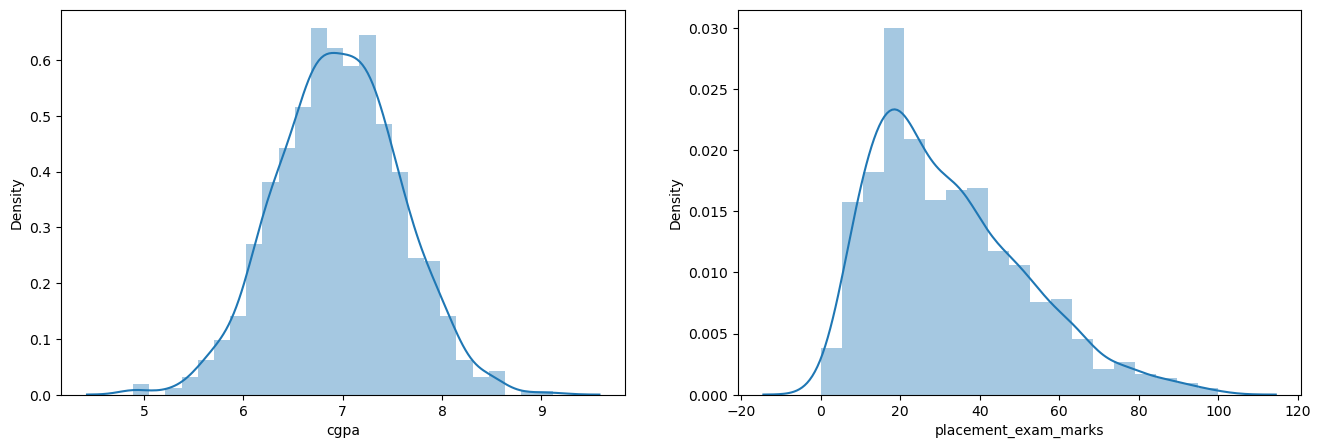

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(16,5))
plt.subplot(1, 2, 1)
sns.distplot(df['cgpa'])

plt.subplot(1, 2, 2)
sns.distplot(df['placement_exam_marks'])

plt.show()

In [8]:
df["placement_exam_marks"].skew()

0.8356419499466834

In [9]:
df["placement_exam_marks"].mean()

32.225

In [10]:
df["cgpa"].mean()

6.96124

In [11]:
df["cgpa"].std()

0.6158978751323894

In [12]:
df["cgpa"].min()

4.89

In [13]:
df["cgpa"].max()

9.12

In [14]:
df['cgpa'].mean() + 3*df['cgpa'].std()

8.808933625397168

In [15]:
df['cgpa'].mean() - 3*df['cgpa'].std()

5.113546374602832

In [16]:
df[df["cgpa"]>8.80]

,cgpa,placement_exam_marks,placed
995,8.87,44.0,1
996,9.12,65.0,1


In [17]:
df[df["cgpa"]<5.11]

,cgpa,placement_exam_marks,placed
485,4.92,44.0,1
997,4.89,34.0,0
999,4.90,10.0,1


In [18]:
df[(df["cgpa"]>8.80) | (df["cgpa"]<5.11)]

,cgpa,placement_exam_marks,placed
485,4.92,44.0,1
995,8.87,44.0,1
996,9.12,65.0,1
997,4.89,34.0,0
999,4.90,10.0,1


### Trimming

In [19]:
new_df = df[(df["cgpa"]<8.80) & (df["cgpa"]>5.11)]

In [20]:
new_df.head()

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0


C:\Users\Rishav\anaconda3\Lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<Axes: xlabel='cgpa', ylabel='Density'>

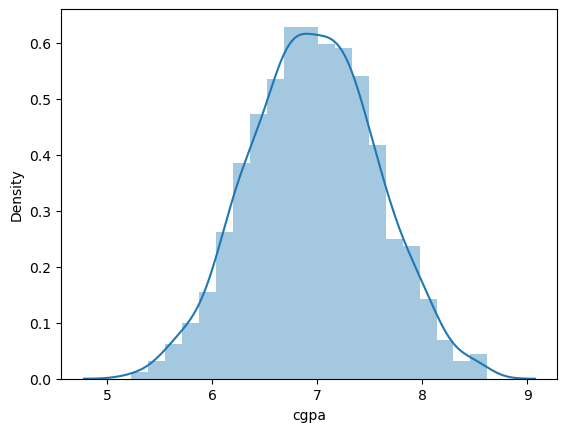

In [21]:
sns.distplot(new_df["cgpa"])

### Capping

In [22]:
upper_lmit = df['cgpa'].mean() + 3*df['cgpa'].std()
lower_lmit = df['cgpa'].mean() - 3*df['cgpa'].std()

In [23]:
import numpy as np
np.where(df["cgpa"]>upper_lmit,upper_lmit, np.where(df["cgpa"]>lower_lmit,lower_lmit, df["cgpa"]))

array([5.11354637, 5.11354637, 5.11354637, 5.11354637, 5.11354637,
       5.11354637, 5.11354637, 5.11354637, 5.11354637, 5.11354637,
       5.11354637, 5.11354637, 5.11354637, 5.11354637, 5.11354637,
       5.11354637, 5.11354637, 5.11354637, 5.11354637, 5.11354637,
       5.11354637, 5.11354637, 5.11354637, 5.11354637, 5.11354637,
       5.11354637, 5.11354637, 5.11354637, 5.11354637, 5.11354637,
       5.11354637, 5.11354637, 5.11354637, 5.11354637, 5.11354637,
       5.11354637, 5.11354637, 5.11354637, 5.11354637, 5.11354637,
       5.11354637, 5.11354637, 5.11354637, 5.11354637, 5.11354637,
       5.11354637, 5.11354637, 5.11354637, 5.11354637, 5.11354637,
       5.11354637, 5.11354637, 5.11354637, 5.11354637, 5.11354637,
       5.11354637, 5.11354637, 5.11354637, 5.11354637, 5.11354637,
       5.11354637, 5.11354637, 5.11354637, 5.11354637, 5.11354637,
       5.11354637, 5.11354637, 5.11354637, 5.11354637, 5.11354637,
       5.11354637, 5.11354637, 5.11354637, 5.11354637, 5.11354

In [24]:
df["cgpa"] = np.where(df["cgpa"]>upper_lmit,upper_lmit, df["cgpa"])

In [25]:
df["cgpa"] = np.where(df["cgpa"]<lower_lmit,lower_lmit, df["cgpa"])

In [26]:
df["cgpa"].max()

8.808933625397168

In [27]:
df["cgpa"].min()

5.113546374602832

In [28]:
upper_lmit

8.808933625397168

In [29]:
lower_lmit

5.113546374602832

In [30]:
df.shape

(1000, 3)

C:\Users\Rishav\anaconda3\Lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<Axes: xlabel='cgpa', ylabel='Density'>

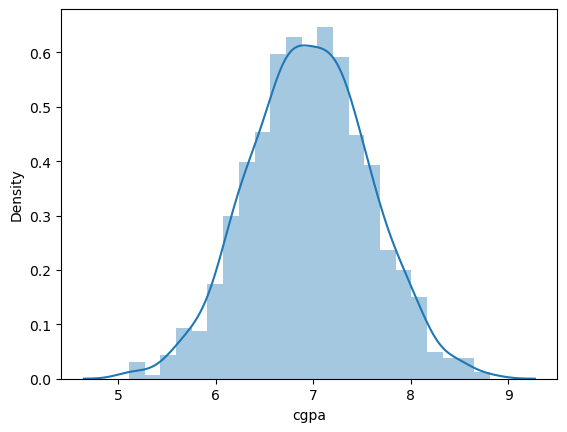

In [31]:
sns.distplot(df["cgpa"])

C:\Users\Rishav\anaconda3\Lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<Axes: xlabel='placement_exam_marks'>

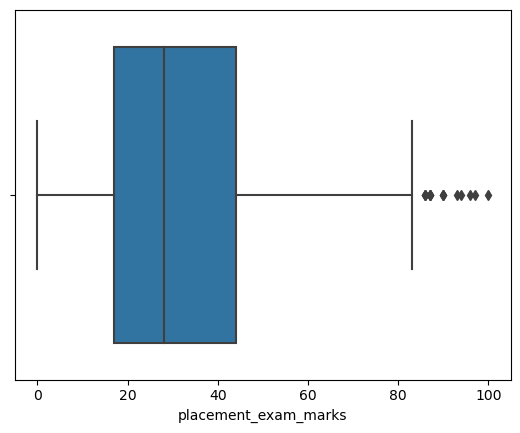

In [32]:
sns.boxplot(df['placement_exam_marks'])

In [33]:
percentile25 = df['placement_exam_marks'].quantile(0.25)
percentile75 = df['placement_exam_marks'].quantile(0.75)

In [34]:
percentile75

44.0

In [35]:
percentile25

17.0

In [36]:
iqr = percentile75-percentile25

In [37]:
iqr

27.0

In [38]:
lower_fence = percentile25 - 1.58*iqr
upper_fence = percentile75 + 1.58*iqr

In [39]:
lower_fence

-25.660000000000004

In [40]:
upper_fence

86.66

In [41]:
df[df['placement_exam_marks']> upper_fence]

,cgpa,placement_exam_marks,placed
9,7.75,94.0,1
134,6.33,93.0,0
162,7.80,90.0,0
283,7.09,87.0,0
290,8.38,87.0,0
311,6.97,87.0,1
324,6.64,90.0,0
630,6.56,96.0,1
685,6.05,87.0,1
730,6.14,90.0,1


In [42]:
df[df['placement_exam_marks'] < lower_fence]

,cgpa,placement_exam_marks,placed


In [43]:
new_df = df[df['placement_exam_marks'] <= upper_fence]

In [44]:
new_df.shape

(988, 3)

C:\Users\Rishav\anaconda3\Lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<Axes: xlabel='placement_exam_marks'>

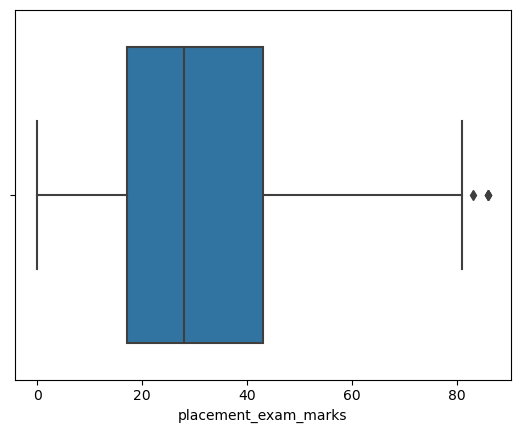

In [45]:
sns.boxplot(new_df["placement_exam_marks"])

C:\Users\Rishav\anaconda3\Lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Rishav\anaconda3\Lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Rishav\anaconda3\Lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).


<Axes: xlabel='placement_exam_marks'>

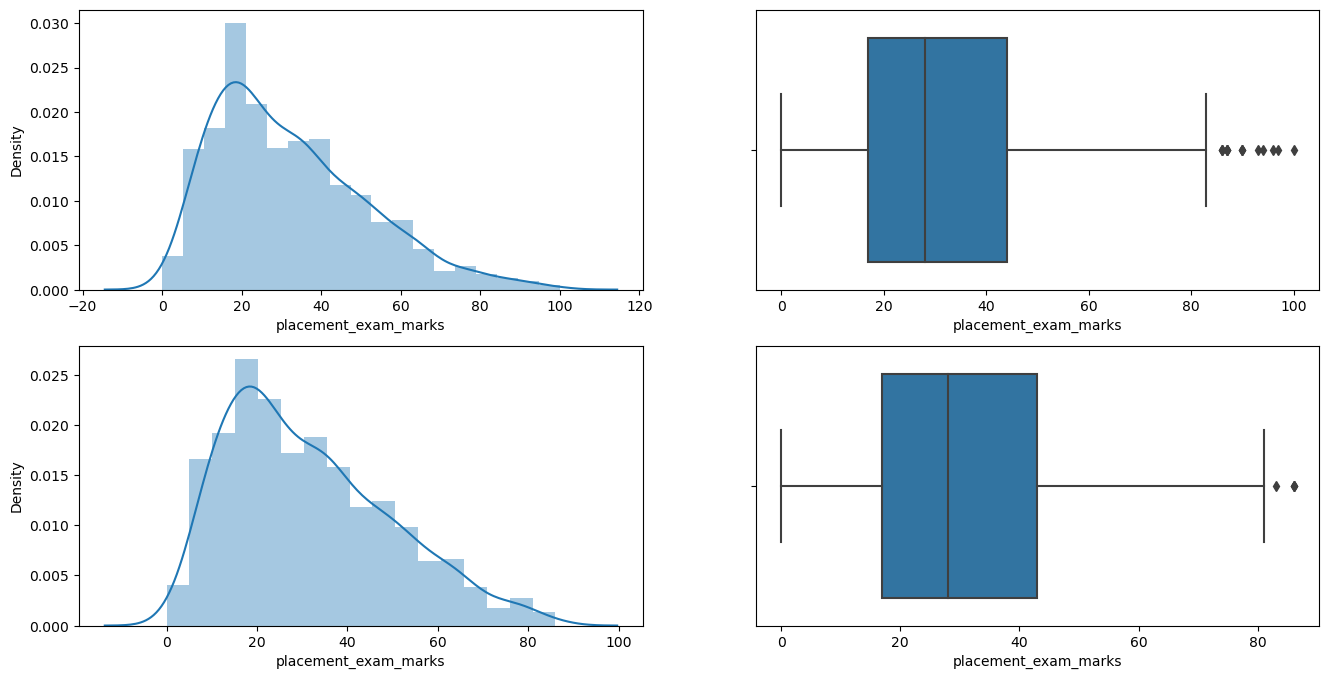

In [46]:
plt.figure(figsize=(16, 8))
plt.subplot(2, 2, 1)
sns.distplot(df['placement_exam_marks'])

plt.subplot(2, 2, 2)
sns.boxplot(df['placement_exam_marks'])

plt.subplot(2, 2, 3)
sns.distplot(new_df['placement_exam_marks'])

plt.subplot(2, 2, 4)
sns.boxplot(new_df['placement_exam_marks'])

### Capping method on column placement exam marks

### percentile

In [47]:
percentile10 = df['placement_exam_marks'].quantile(0.10)
percentile85 = df['placement_exam_marks'].quantile(0.85)

In [48]:
df = sns.load_dataset("tips")

In [49]:
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


C:\Users\Rishav\anaconda3\Lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<Axes: xlabel='total_bill', ylabel='Density'>

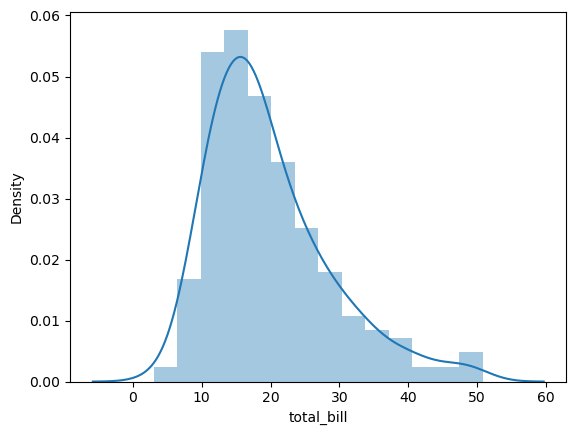

In [50]:
sns.distplot(df.total_bill, kde=True)

C:\Users\Rishav\anaconda3\Lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<Axes: xlabel='total_bill'>

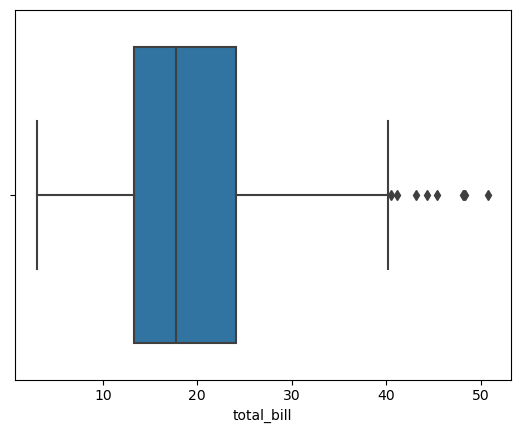

In [51]:
sns.boxplot(df.total_bill)

In [52]:
df.total_bill.skew()*100

113.32130376158204

<Axes: xlabel='total_bill'>

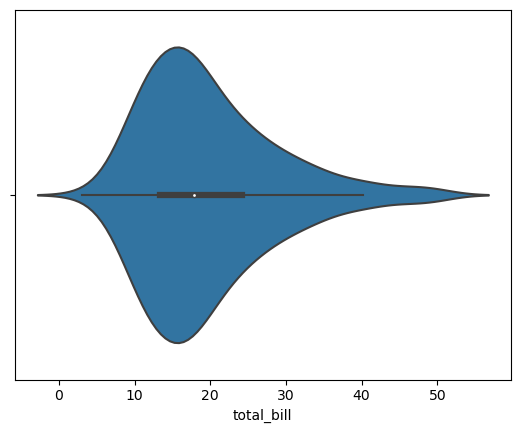

In [53]:
sns.violinplot(x=df.total_bill, inner="box")